**Assumptions:**

* A fleet of 250 buses in our yard.
* Each bus has a variable battery capacity between 70 and 100 kWh.
* Initial charge level of each bus is randomly set between 15% and 40% of its battery capacity.
* The charging window available is from 8 PM to 4 AM, totaling 8 hours.
* Within the charging window - Electricity rates are variable each hour  represented as a list of hypothetical rates.
* Using standard CCS chargers with a power level of 50 kW.

**Code Summary:**
* Bus Initialization:
  * Initializes each bus with a random capacity and a random initial charge within the given ranges. Calculates the amount of charge each bus needs to be fully charged.

* Charging Allocation:
  * Sorts the buses based on their needed charge in descending order.
  * Determines the optimal number of buses to be charged each hour based on electricity rates, ensuring the cheapest total cost.
  * Allocates charge to buses in each hour, prioritizing the hours with the lowest electricity rates while considering the charger power level and the total load capacity.


* Calculating Outputs:
  * Computes the total cost to charge all buses.
  * Calculates the minimum electric load required for the facility.
  * Determines the number of buses that can be charged simultaneously.

* Detailing Hourly Outputs:
  * Provides an hourly breakdown detailing the number of buses charged, the charge delivered, and the electricity rate for each hour within the charging window.

* Final Reporting:
  * Outputs the summarized results including the minimum electric load required, the number of buses that can be charged simultaneously, the total energy needed to charge all buses, and the total cost to charge all buses.
  * Gives detailed hourly information about the charging process and the associated cost.


In [ ]:
import random
import matplotlib.pyplot as plt

class Bus:
    def __init__(self):
        self.capacity = random.uniform(70, 100)  # kWh
        self.initial_charge = self.capacity * random.uniform(0.15, 0.4)  # kWh
        self.needed_charge = self.capacity - self.initial_charge  # kWh

def cheapest_load_and_buses(n_buses, charging_window, charger_power, electricity_rates):
    buses = sorted([Bus() for _ in range(n_buses)], key=lambda x: x.needed_charge, reverse=True)
    total_cost = 0

    # List to store how many buses are charged each hour and charge delivered each hour
    buses_charged_each_hour = [0] * charging_window
    charge_delivered_each_hour = [0] * charging_window

    for bus in buses:
        remaining_charge = bus.needed_charge
        for hour, rate in sorted(enumerate(electricity_rates), key=lambda x: x[1]):
            if remaining_charge <= 0:
                break
            if charger_power * (buses_charged_each_hour[hour] + 1) <= charger_power * simultaneous_buses:
                charge_this_hour = min(remaining_charge, charger_power)
                total_cost += charge_this_hour * rate
                remaining_charge -= charge_this_hour
                buses_charged_each_hour[hour] += 1
                charge_delivered_each_hour[hour] += charge_this_hour

    return total_cost, buses_charged_each_hour, charge_delivered_each_hour


n_buses = 250  # Number of buses
charging_window = 8  # Charging time window in hours
charger_power = 50  # Power level of a standard CCS charger in kW
electricity_rates = [0.5, 0.25, 0.20, 0.10, 0.12, 0.18, 0.14, 0.16]  # Hypothetical electricity rates in $/kWh for each hour

# Calculating the simultaneous buses and total needed charge first
buses = [Bus() for _ in range(n_buses)]
total_needed_charge = sum(bus.needed_charge for bus in buses)  # Total energy needed
simultaneous_buses = total_needed_charge / (charging_window * charger_power)  # Given the charger power level
minimum_load = charger_power * simultaneous_buses  # Minimum load required to the facility

# Getting the total cost, buses charged, and charge delivered each hour
total_cost, buses_charged_each_hour, charge_delivered_each_hour = cheapest_load_and_buses(
    n_buses, charging_window, charger_power, electricity_rates
)



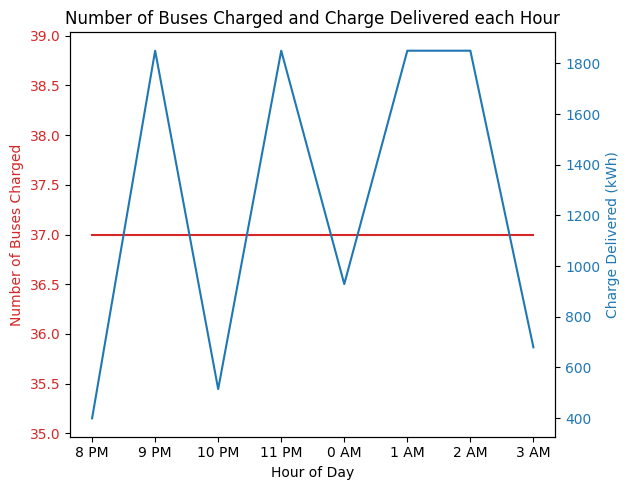

The minimum electric load required to the facility is 1880.47 kW
The number of buses that can be charged simultaneously is 37.61
The total energy needed to charge all buses is 15043.75 kWh
The total cost to charge all buses is $1762.35
Hourly Details:
 - Hour 1 (8 PM):
    Buses Charged: 37
    Charge Delivered: 399.33 kWh
    Electricity Rate: $0.50/kWh
 - Hour 2 (9 PM):
    Buses Charged: 37
    Charge Delivered: 1850.00 kWh
    Electricity Rate: $0.25/kWh
 - Hour 3 (10 PM):
    Buses Charged: 37
    Charge Delivered: 514.72 kWh
    Electricity Rate: $0.20/kWh
 - Hour 4 (11 PM):
    Buses Charged: 37
    Charge Delivered: 1850.00 kWh
    Electricity Rate: $0.10/kWh
 - Hour 5 (0 AM):
    Buses Charged: 37
    Charge Delivered: 929.24 kWh
    Electricity Rate: $0.12/kWh
 - Hour 6 (1 AM):
    Buses Charged: 37
    Charge Delivered: 1850.00 kWh
    Electricity Rate: $0.18/kWh
 - Hour 7 (2 AM):
    Buses Charged: 37
    Charge Delivered: 1850.00 kWh
    Electricity Rate: $0.14/kWh
 - Hour

In [ ]:
# Getting the total cost, buses charged, and charge delivered each hour
total_cost, buses_charged_each_hour, charge_delivered_each_hour = cheapest_load_and_buses(
    n_buses, charging_window, charger_power, electricity_rates
)

# Plotting the results
hours = [f"{8 + i} PM" if i <   4 else f"{(i - 4)} AM" for i in range(charging_window)]  # x-axis labels representing each hour in the charging window

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Number of Buses Charged', color=color)
ax1.plot(hours, buses_charged_each_hour, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Charge Delivered (kWh)', color=color)
ax2.plot(hours, charge_delivered_each_hour, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Number of Buses Charged and Charge Delivered each Hour')
plt.show()

# Displaying all the calculated outputs
print(f"The minimum electric load required to the facility is {minimum_load:.2f} kW")
print(f"The number of buses that can be charged simultaneously is {simultaneous_buses:.2f}")
print(f"The total energy needed to charge all buses is {total_needed_charge:.2f} kWh")
print(f"The total cost to charge all buses is ${total_cost:.2f}")
print("Hourly Details:")
for hour in range(charging_window):
    print(f" - Hour {hour + 1} ({hours[hour]}):")
    print(f"    Buses Charged: {buses_charged_each_hour[hour]}")
    print(f"    Charge Delivered: {charge_delivered_each_hour[hour]:.2f} kWh")
    print(f"    Electricity Rate: ${electricity_rates[hour]:.2f}/kWh")


# Update 10/7